In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd

%matplotlib inline

hypot = lambda vec: np.sqrt( vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2] )
# c = 1 cambia las unidades de tiempo a: 1/3 * 10^{-8} [s]
# como si viesemos el fenomeno ocurrir en camara lenta
c = 1

# periodo de la oscilacion en la unidad de tiempo nueva
# 
T = 20

omega = 2 * np.pi / T

d = 0.5
q = 1
po = q*d
t = 0

q_plus = lambda t: d * np.cos( omega * t )
q_minus = lambda t: -d * np.cos( omega * t )

In [2]:
def Sd(rx, ry, rz, t=2):
    rvec = np.array([rx,ry,rz])
    r = hypot(rvec)


    # phi no se calculara por la simetria
    theta =  np.arctan2( np.hypot(rx,ry), rz)

    I1 = np.sin(theta) / r
    I2 = np.cos( omega* (t - r/c) )

    return I1 * I1 * I2 * I2  * rvec / r


def E_field_u(rx, ry, rz, t=2):
    # a coordenadas polares
    rvec = np.array([rx,ry,rz])
    r = hypot(rvec)
    phi = np.arctan2( ry, rx )
    theta =  np.arctan2( np.hypot(rx,ry), rz)


    # vectores unitarios
    r_hat = rvec / r
    theta_hat = np.array([
        np.cos(phi) * np.cos(theta),
        np.sin(phi) * np.cos(theta),
        - np.sin(theta)
        ])  


    Zet = np.sin( omega* (t - r/c) )
    Omg = np.cos( omega* (t - r/c) )

    return - (  Omg * ( omega*omega/(c*c*r)  -  2/(r*r*r))
        + ( (1+np.cos(theta))/(r*r) ) * Zet
        ) * r_hat 
    + ( np.sin(theta) * omega/( r*r* c) ) * Zet * theta_hat

In [3]:
# Crea los slices

N = 20
x = np.linspace(.5, 5, N)
y = np.linspace(-5, 5, N)
z = np.linspace(-8, 8, N)
xv, yv, zv = np.meshgrid(x, y, z)

t = 1

Sret = lambda x,y,z: Sd(x,y,z, t=t)

S_field = np.vectorize(Sret, signature='(),(),()->(n)')(xv, yv, zv)
Sx = S_field[:,:,:,0]
Sy = S_field[:,:,:,1]
Sz = S_field[:,:,:,2]


Eret = lambda x,y,z: E_field_u(x,y,z, t=t)

E_field = np.vectorize(Eret, signature='(),(),()->(n)')(xv, yv, zv)
Ex = S_field[:,:,:,0]
Ey = S_field[:,:,:,1]
Ez = S_field[:,:,:,2]

In [ ]:
# plot S
for t in np.linspace(0,20,4):
    Sret = lambda x,y,z: Sd(x,y,z, t=t)

    S_field = np.vectorize(Sret, signature='(),(),()->(n)')(xv, yv, zv)
    Sx = S_field[:,:,:,0]
    Sy = S_field[:,:,:,1]
    Sz = S_field[:,:,:,2]

    fig = plt.figure(clear=True)
    ax = fig.add_subplot(111, projection='3d')
    # el campo electrico
    ax.quiver(xv, yv, zv, Sx, Sy, Sz, length=1)
    # las cargas
    rz = [q_plus(t), q_minus(t)]
    ax.scatter(0, 0,rz , color= ['b', 'r'])
    # plt.savefig(f'plots/{t}.png')
    plt.show()
    

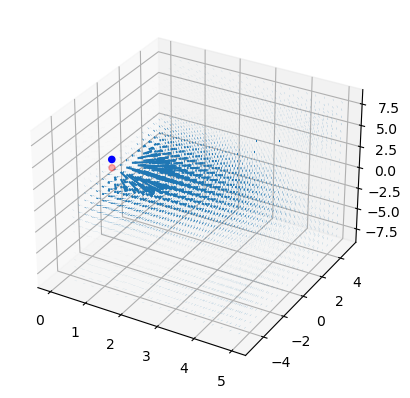

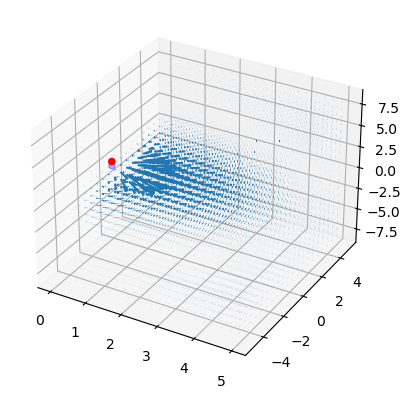

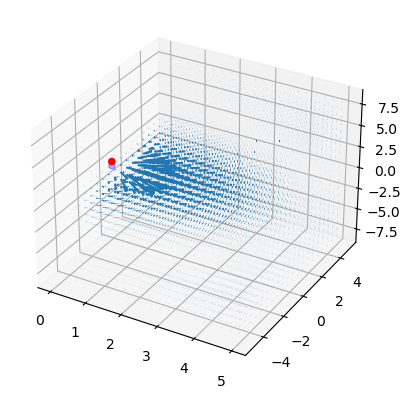

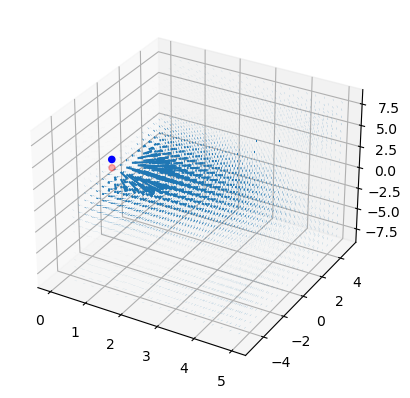

In [4]:
# plot E
counter = 0
for t in np.linspace(0,20,4):
    Eret = lambda x,y,z: E_field_u(x,y,z, t=t)

    E_field = np.vectorize(Eret, signature='(),(),()->(n)')(xv, yv, zv)
    Ex = S_field[:,:,:,0]
    Ey = S_field[:,:,:,1]
    Ez = S_field[:,:,:,2]

    fig = plt.figure(clear=True)
    ax = fig.add_subplot(111, projection='3d')
    # el campo electrico
    ax.quiver(xv, yv, zv, Ex, Ey, Ez, length=1)
    # las cargas
    rz = [q_plus(t), q_minus(t)]
    ax.scatter(0, 0,rz , color= ['b', 'r'])
    # plt.savefig(f'plots/{str(counter).zfill(4)}.png')
    counter += 1
    plt.show()